In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.neighbors import KernelDensity

In [2]:
import os

In [3]:
os.chdir("\\Users\\Joaquin\\Desktop\\Facu\\big data\\TPs\\TP2_Introducción a la EPH\\Bases de microdatos EPH")

In [4]:
individual_2004 = pd.read_stata('Individual_t104.dta')

In [5]:
individual_2024 = pd.read_excel("usu_individual_T124.xlsx")

In [6]:
individual_2004[individual_2004["region"]=="Gran Buenos Aires"]

,CODUSU,nro_hogar,componente,h15,ano4,trimestre,region,mas_500,aglomerado,pondera,...,deccfr,ideccfr,rdeccfr,gdeccfr,pdeccfr,adeccfr,pj1_1,pj2_1,pj3_1,idimpp
0,125098,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1299.0,...,07,,06,06,,04,0.0,0.0,0.0,00000
1,125397,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,2018.0,...,00,,00,00,,00,0.0,0.0,0.0,00000
2,125515,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1486.0,...,07,,07,07,,05,0.0,0.0,0.0,00020
3,125558,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1674.0,...,08,,08,08,,06,0.0,0.0,0.0,00000
4,125558,1.0,2.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1674.0,...,08,,08,08,,06,0.0,0.0,0.0,00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7642,288171,1.0,3.0,0.0,2004.0,1er. Trimestre,Gran Buenos Aires,S,Partidos del GBA,1454.0,...,08,,08,08,,09,0.0,0.0,0.0,00000
7643,288405,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Partidos del GBA,1673.0,...,02,,02,02,,02,0.0,0.0,0.0,00000
7644,288405,1.0,2.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Partidos del GBA,1673.0,...,02,,02,02,,02,0.0,0.0,0.0,00000
7645,288405,1.0,3.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Partidos del GBA,1673.0,...,02,,02,02,,02,0.0,0.0,0.0,00000


In [7]:
individual_2024[individual_2024["REGION"]==1]

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,PDECIFR,ADECIFR,IPCF,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH
245,TQRMNOSUWHLKMUCDEIJAH00855260,2024,1,1,1,1,1,S,33,1810,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0
246,TQRMNOSUWHLKMUCDEIJAH00855260,2024,1,1,2,1,1,S,33,1810,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0
247,TQRMNOSUWHLKMUCDEIJAH00855260,2024,1,1,3,1,1,S,33,1810,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0
255,TQSMNORWVHLLKQCDEIJAH00856914,2024,1,1,1,1,1,S,33,2368,...,NaN,6,500000.0,9,NaN,9,9.0,NaN,9,3324
256,TQRMNOPQQHLOLRCDEIJAH00855133,2024,1,1,1,1,1,S,33,1223,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46045,TQRMNOPUQHKMKNCDEIJAH00861661,2024,1,1,1,1,1,S,33,3410,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0
46046,TQRMNOPUQHKMKNCDEIJAH00861661,2024,1,1,2,2,1,S,33,3410,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0
46047,TQRMNOPUQHKMKNCDEIJAH00861661,2024,1,1,3,2,1,S,33,3410,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0
46048,TQRMNOPUQHKMKNCDEIJAH00861661,2024,1,1,4,2,1,S,33,3410,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0


In [8]:
individual_2004.reset_index(inplace=True)
individual_GBA_2004 = individual_2004[individual_2004["region"]=="Gran Buenos Aires"]

In [9]:
individual_2024.reset_index(inplace=True)
individual_GBA_2024 = individual_2024[individual_2024["REGION"]==1]

In [10]:
edad_2004 = individual_GBA_2004['ch06']
edad_2004

0       79.0
1       67.0
2       74.0
3       54.0
4       51.0
        ... 
7642     1.0
7643    51.0
7644    55.0
7645    12.0
7646    22.0
Name: ch06, Length: 7647, dtype: category
Categories (99, object): ['Menos de 1 año' < 1.0 < 2.0 < 3.0 ... 95.0 < 96.0 < 97.0 < '98 y más años']

In [11]:
individual_GBA_2004[individual_GBA_2004["estado"]=="Ocupado"]

,index,CODUSU,nro_hogar,componente,h15,ano4,trimestre,region,mas_500,aglomerado,...,deccfr,ideccfr,rdeccfr,gdeccfr,pdeccfr,adeccfr,pj1_1,pj2_1,pj3_1,idimpp
1,1,125397,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,...,00,,00,00,,00,0.0,0.0,0.0,00000
3,3,125558,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,...,08,,08,08,,06,0.0,0.0,0.0,00000
5,5,125558,1.0,3.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,...,08,,08,08,,06,0.0,0.0,0.0,00000
6,6,125558,1.0,4.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,...,08,,08,08,,06,0.0,0.0,0.0,00000
7,7,125599,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,...,04,,04,04,,02,0.0,0.0,0.0,00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7637,7637,287998,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Partidos del GBA,...,01,,01,01,,01,Tiene plan jefas y jefes,0.0,0.0,00000
7640,7640,288171,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Partidos del GBA,...,08,,08,08,,09,0.0,0.0,0.0,00000
7643,7643,288405,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Partidos del GBA,...,02,,02,02,,02,0.0,0.0,0.0,00000
7644,7644,288405,1.0,2.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Partidos del GBA,...,02,,02,02,,02,0.0,0.0,0.0,00000


In [12]:
individual_GBA_2004[individual_GBA_2004["estado"]=="Desocupado"]

,index,CODUSU,nro_hogar,componente,h15,ano4,trimestre,region,mas_500,aglomerado,...,deccfr,ideccfr,rdeccfr,gdeccfr,pdeccfr,adeccfr,pj1_1,pj2_1,pj3_1,idimpp
8,8,125599,1.0,2.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,...,04,,04,04,,02,0.0,0.0,0.0,00000
14,14,125783,1.0,3.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,...,03,,03,03,,01,0.0,0.0,0.0,00000
19,19,126175,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,...,10,,10,10,,08,0.0,0.0,0.0,00000
24,24,126225,1.0,4.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,...,10,,10,10,,09,0.0,0.0,0.0,00000
33,33,127045,1.0,3.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,...,04,,03,04,,01,0.0,0.0,0.0,00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7536,7536,284974,1.0,2.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Partidos del GBA,...,08,,07,07,,08,0.0,0.0,0.0,00000
7586,7586,286364,1.0,2.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Partidos del GBA,...,01,,01,01,,01,0.0,0.0,0.0,00000
7609,7609,287100,1.0,4.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Partidos del GBA,...,02,,02,02,,02,0.0,0.0,0.0,00000
7635,7635,287810,1.0,2.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Partidos del GBA,...,08,,08,08,,09,0.0,0.0,0.0,00000


In [13]:
edad_2024 = individual_GBA_2024['CH06']
edad_2024

245      85
246      59
247      57
255      26
256      88
         ..
46045    43
46046    21
46047    20
46048    11
46049    24
Name: CH06, Length: 7051, dtype: int64

In [14]:
individual_GBA_2024[individual_GBA_2024["ESTADO"]==1]

,index,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,...,PDECIFR,ADECIFR,IPCF,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH
245,245,TQRMNOSUWHLKMUCDEIJAH00855260,2024,1,1,1,1,1,S,33,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0
246,246,TQRMNOSUWHLKMUCDEIJAH00855260,2024,1,1,2,1,1,S,33,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0
247,247,TQRMNOSUWHLKMUCDEIJAH00855260,2024,1,1,3,1,1,S,33,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0
255,255,TQSMNORWVHLLKQCDEIJAH00856914,2024,1,1,1,1,1,S,33,...,NaN,6,500000.0,9,NaN,9,9.0,NaN,9,3324
271,271,TQRMNOQRXHLMQNCDEIJAH00855032,2024,1,1,1,1,1,S,33,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46036,46036,TQRMNORWVHLKOPCDEIIAD00861660,2024,1,1,3,1,1,S,32,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0
46040,46040,TQRMNOPSYHJLOQCDEIIAD00794774,2024,1,1,1,1,1,S,32,...,NaN,7,910000.0,10,NaN,10,10.0,NaN,10,1781
46043,46043,TQRMNOSXVHJKKMCDEIJAH00794775,2024,1,1,3,1,1,S,33,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0
46044,46044,TQRMNOSXVHJKKMCDEIJAH00794775,2024,1,1,4,1,1,S,33,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0


In [15]:
individual_GBA_2024[individual_GBA_2024["ESTADO"]==2]

,index,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,...,PDECIFR,ADECIFR,IPCF,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH
540,540,TQRMNOQWQHLLKNCDEIJAH00855551,2024,1,1,1,1,1,S,33,...,NaN,12,0.00,12,NaN,12,12.0,NaN,12,0
925,925,TQRMNOPVUHMLPOCDEIJAH00802200,2024,1,1,2,1,1,S,33,...,NaN,6,156666.67,4,NaN,4,4.0,NaN,5,5092
1638,1638,TQRMNOPYTHJOQOCDEIJAH00802203,2024,1,1,2,1,1,S,33,...,NaN,9,200000.00,6,NaN,5,6.0,NaN,6,7558
1671,1671,TQRMNOSQXHJMQUCDEIJAH00855443,2024,1,1,5,1,1,S,33,...,NaN,12,0.00,12,NaN,12,12.0,NaN,12,0
1673,1673,TQRMNORVUHKOTNCDEIJAH00859157,2024,1,1,2,1,1,S,33,...,NaN,12,0.00,12,NaN,12,12.0,NaN,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45458,45458,TQRMNOSSVHKLNSCDEIIAD00861613,2024,1,1,1,1,1,S,32,...,NaN,1,185000.00,5,NaN,5,5.0,NaN,3,2078
45465,45465,TQRMNOQVYHLOLSCDEIJAH00855678,2024,1,1,2,1,1,S,33,...,NaN,6,250000.00,7,NaN,6,7.0,NaN,7,1941
45777,45777,TQRMNORSTHJOLTCDEIJAH00794561,2024,1,1,1,1,1,S,33,...,NaN,8,117142.86,3,NaN,3,3.0,NaN,3,6730
45843,45843,TQRMNOQXSHMMLOCDEIJAH00807671,2024,1,1,1,1,1,S,33,...,NaN,12,0.00,12,NaN,12,12.0,NaN,12,0


In [16]:
estado_dict = {0: "Entrevista individual no realizada (no respuesta al cuestionario individual)", 1: "Ocupado", 2: "Desocupado", 3: "Inactivo", 4: "Menor de 10 años"} 
individual_GBA_2024["estado"] = individual_GBA_2024["ESTADO"].map(estado_dict)
individual_GBA_2024["estado"].dropna()

C:\Users\Joaquin\AppData\Local\Temp\ipykernel_10452\687960334.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  individual_GBA_2024["estado"] = individual_GBA_2024["ESTADO"].map(estado_dict)


245                                                Ocupado
246                                                Ocupado
247                                                Ocupado
255                                                Ocupado
256                                               Inactivo
                               ...                        
46045                                              Ocupado
46046    Entrevista individual no realizada (no respues...
46047    Entrevista individual no realizada (no respues...
46048    Entrevista individual no realizada (no respues...
46049    Entrevista individual no realizada (no respues...
Name: estado, Length: 7051, dtype: object

In [17]:
individual_GBA_2004["estado"].str.strip("0.0").dropna()

0               Inactivo
1                Ocupado
2               Inactivo
3                Ocupado
4               Inactivo
              ...       
7642    Menor de 10 años
7643             Ocupado
7644             Ocupado
7645            Inactivo
7646             Ocupado
Name: estado, Length: 7647, dtype: object

In [18]:
#Parte 1, Ejercicio 1
edad_2004_clean = edad_2004.copy()
edad_2004_clean = edad_2004_clean.replace("Menos de 1 año", 0)
edad_2004_clean = edad_2004_clean.replace("98 y más años", 99)  
edad2_2004 = pd.to_numeric(edad_2004_clean) ** 2
edad2_2004

C:\Users\Joaquin\AppData\Local\Temp\ipykernel_10452\938889197.py:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  edad_2004_clean = edad_2004_clean.replace("Menos de 1 año", 0)
C:\Users\Joaquin\AppData\Local\Temp\ipykernel_10452\938889197.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  edad_2004_clean = edad_2004_clean.replace("98 y más años", 99)
C:\Users\Joaquin\AppData\Local\Temp\ipykernel_10452\938889197.py:4: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, rep

0       6241.0
1       4489.0
2       5476.0
3       2916.0
4       2601.0
         ...  
7642       1.0
7643    2601.0
7644    3025.0
7645     144.0
7646     484.0
Name: ch06, Length: 7647, dtype: float64

In [19]:
edad_2024_clean = edad_2024.copy()  
edad2_2024 = pd.to_numeric(edad_2024_clean) ** 2
edad2_2024

245      7225
246      3481
247      3249
255       676
256      7744
         ... 
46045    1849
46046     441
46047     400
46048     121
46049     576
Name: CH06, Length: 7051, dtype: int64

C:\Users\Joaquin\AppData\Local\Temp\ipykernel_10452\505344392.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  individual_GBA_2004['edad_2004_numeric'] = pd.to_numeric(edad_2004_clean)
C:\Users\Joaquin\AppData\Local\Temp\ipykernel_10452\505344392.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the origina

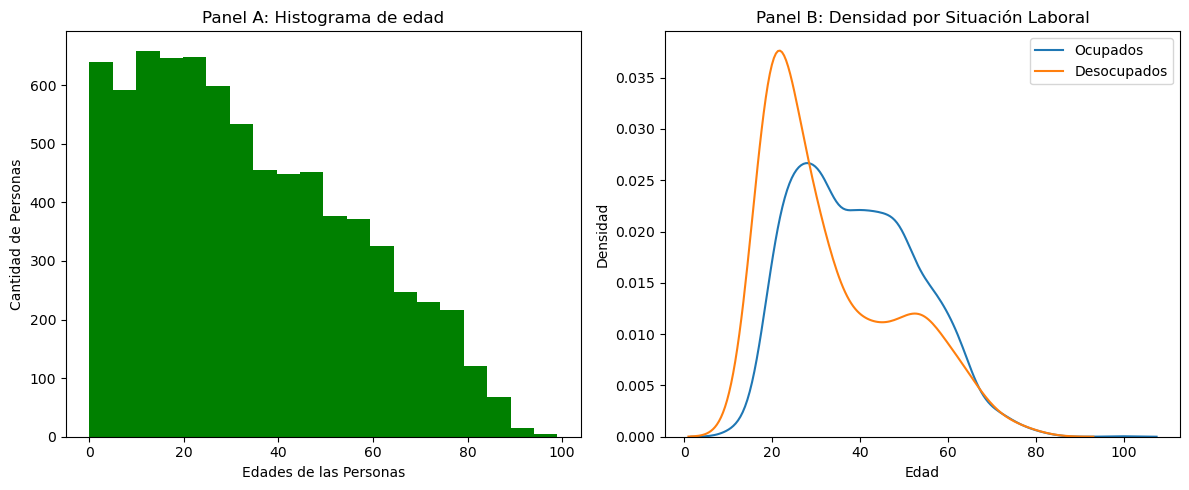

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
# Panel A: Histograma de edad
individual_GBA_2004['edad_2004_numeric'] = pd.to_numeric(edad_2004_clean)
individual_GBA_2004['edad_2004_numeric'].replace([np.inf, -np.inf], np.nan, inplace=True)
axes[0].hist(edad_2004_clean, bins=20, alpha=1, color='green')
axes[0].set_title("Panel A: Histograma de edad")
axes[0].set_xlabel('Edades de las Personas')
axes[0].set_ylabel('Cantidad de Personas')

# Panel B: Densidad para ocupados y desocupados
ocupados_data = individual_GBA_2004[individual_GBA_2004["estado"]=="Ocupado"]['edad_2004_numeric']
ocupados_data = ocupados_data.replace([np.inf, -np.inf], np.nan)
desocupados_data = individual_GBA_2004[individual_GBA_2004["estado"]=="Desocupado"]['edad_2004_numeric']
desocupados_data = desocupados_data.replace([np.inf, -np.inf], np.nan)
sns.kdeplot(ocupados_data, label='Ocupados', ax=axes[1])
sns.kdeplot(desocupados_data, label='Desocupados', ax=axes[1])
axes[1].set_title("Panel B: Densidad por Situación Laboral")
axes[1].set_xlabel("Edad")
axes[1].set_ylabel("Densidad")
axes[1].legend()
plt.savefig("gráfico ej 1 2004.png", bbox_inches='tight', dpi=300)
plt.tight_layout()
plt.show()

C:\Users\Joaquin\AppData\Local\Temp\ipykernel_10452\3272933954.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  individual_GBA_2024['edad_2024_numeric'] = pd.to_numeric(edad_2024_clean)
C:\Users\Joaquin\AppData\Local\Temp\ipykernel_10452\3272933954.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the origi

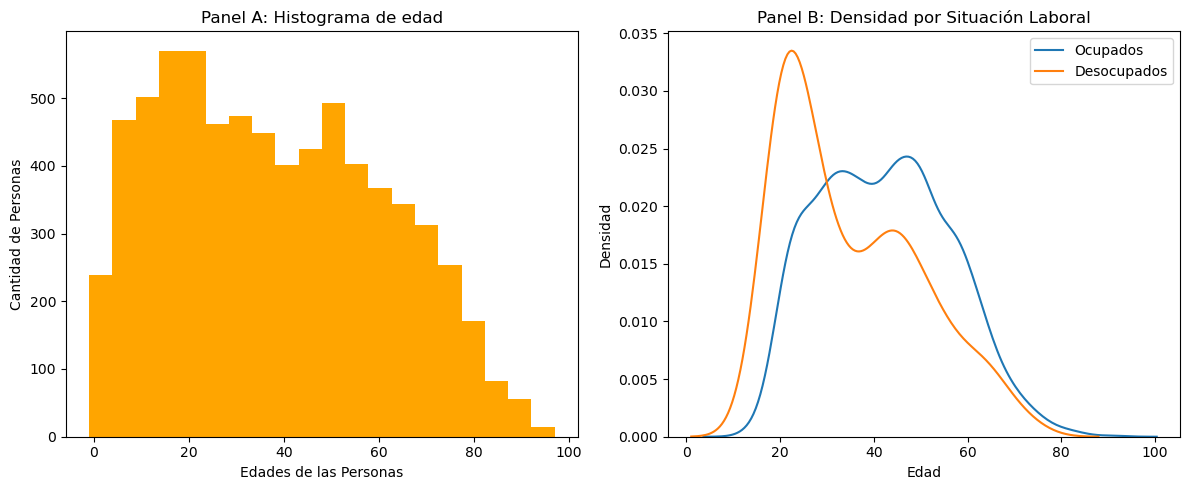

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
# Panel A: Histograma de edad
individual_GBA_2024['edad_2024_numeric'] = pd.to_numeric(edad_2024_clean)
individual_GBA_2024['edad_2024_numeric'].replace([np.inf, -np.inf], np.nan, inplace=True)
axes[0].hist(edad_2024_clean, bins=20, alpha=1, color='orange')
axes[0].set_title("Panel A: Histograma de edad")
axes[0].set_xlabel('Edades de las Personas')
axes[0].set_ylabel('Cantidad de Personas')

# Panel B: Densidad para ocupados y desocupados
ocupados_data = individual_GBA_2024[individual_GBA_2024["estado"]=="Ocupado"]['edad_2024_numeric']
ocupados_data = ocupados_data.replace([np.inf, -np.inf], np.nan)
desocupados_data = individual_GBA_2024[individual_GBA_2024["estado"]=="Desocupado"]['edad_2024_numeric']
desocupados_data = desocupados_data.replace([np.inf, -np.inf], np.nan)
sns.kdeplot(ocupados_data, label='Ocupados', ax=axes[1])
sns.kdeplot(desocupados_data, label='Desocupados', ax=axes[1])
axes[1].set_title("Panel B: Densidad por Situación Laboral")
axes[1].set_xlabel("Edad")
axes[1].set_ylabel("Densidad")
axes[1].legend()
plt.savefig("gráfico ej 1 2024.png", bbox_inches='tight', dpi=300)
plt.tight_layout()
plt.show()

In [22]:
#En el panel A del año 2004 podemos observar prácticamente que cuantos más años tienen, menos personas hay que contestaron, lo cual es lógico y esperable.
#Mientras que en el panel A pero del año 2024 podemos observar que por personas de 0 a 10 años se respondió mucho menos que en el 2004 y además podemos ver como personas de entre 45 a 55 años respondieron mucho más, por eso aparece esa gran suba. 

In [23]:
#En el panel B del año 2004 podemos observar que hay un gran número de desocupados en personas de entre 15 a 25 años, lo cual desciende fuertemente hasta las personas de entre 45 a 55 años que hay un ligero rebote para luego seguir descendiendo y converger con la curva de ocupados. Esta última tiene un comportamiento menos fuerte comenzando un gran ascenso a partir de los 18 años para llegar a un punto máximo en torno a los 30 años, para luego ir descencdiendo levemente hasta los 55 años y a partir de ahi una caída que converge con la de desocupados.
#Mientras que en el panel B pero del año 2024 podemos observar que la curva de desocupados se comporta de manera bastante similar a la curva del año 2004, teniendo una fuerte suba entre los 15 a 22 años alcanzando su punto máximo, para luego descender fuertemente hasta los 35 años donde hay un rebote hasta los 50 años donde vuelve a descender. Luego la curva de ocupados se comporta similr a la curva de ocupados del año 2004 pero esta tiene un punto máximo entre los 45 a 55 años par luego comenzar a descender. 

In [24]:
#Parte 1, Ejercicio 2

In [25]:
ch12_map = {
    "Nan": 0,
    "Jardín/ Preescolar": 1,
    "Primario": 2,
    "EGB": 3,
    "Secundario": 4,
    "Polimodal": 5,
    "Terciario": 6,
    "Universitario": 7,
    "Posgrado Universitario": 8,
    "Educación especial (discapacitado)": 9
}


ch13_map = {
    "Sí": 1,
    "No": 2,
    "Ns./Nr.": 3
}


ch14_map = {
    "Ninguno": 0,
    "Primero": 1,
    "Segundo": 2,
    "Tercero": 3,
    "Cuarto": 4,
    "Quinto": 5,
    "Sexto": 6,
    "Séptimo": 7,
    "Octavo": 8,
    "Noveno": 9,
    "Educación especial": 98,
    "Ns./Nr.": 99
}


individual_GBA_2004["ch12"] = individual_GBA_2004["ch12"].replace(ch12_map)
individual_GBA_2004["ch13"] = individual_GBA_2004["ch13"].replace(ch13_map)
individual_GBA_2004["ch14"] = individual_GBA_2004["ch14"].replace(ch14_map)

C:\Users\Joaquin\AppData\Local\Temp\ipykernel_10452\3043847906.py:38: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  individual_GBA_2004["ch12"] = individual_GBA_2004["ch12"].replace(ch12_map)
C:\Users\Joaquin\AppData\Local\Temp\ipykernel_10452\3043847906.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  individual_GBA_2004["ch12"] = individual_GBA_2004["ch12"].replace(ch12_map)
C:\Users\Joaquin\AppData\Local\Temp\ipykernel_10452\3043847906.py:39: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a

In [26]:
nivel_a_años = {
    1: 0,  # Jardín
    2: 7,  # Primario
    3: 9,  # EGB
    4: 12, # Secundario
    5: 12, # Polimodal
    6: 15, # Terciario
    7: 17, # Universitario
    8: 20, # Posgrado
    9: np.nan  # Educación especial, lo dejamos como NaN
}

In [27]:
def calcular_educ(row, col_ch12, col_ch13, col_ch14):
    ch12 = row[col_ch12]
    ch13 = row[col_ch13]
    ch14 = row[col_ch14]

    # Excluir casos especiales e inconsistentes
    if ch12 == 9 or ch14 in [98, 99] or ch13 == 3:
        return np.nan

    # Finalizó el nivel
    if ch13 == 1:
        return nivel_a_años.get(ch12, np.nan)

    # No finalizó el nivel: usar CH14 solo si es un número válido
    elif ch13 == 2 and ch14 not in [98, 99, 0]:
        return ch14

    return np.nan



In [28]:
# Para la base de 2004: columnas en minúscula
individual_GBA_2004["educ"] = individual_GBA_2004.apply(
    lambda row: calcular_educ(row, "ch12", "ch13", "ch14"), axis=1
)

# Aplicar para la base 2024
individual_GBA_2024["educ"] = individual_GBA_2024.apply(
    lambda row: calcular_educ(row, "CH12", "CH13", "CH14"), axis=1
)

C:\Users\Joaquin\AppData\Local\Temp\ipykernel_10452\1210601083.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  individual_GBA_2004["educ"] = individual_GBA_2004.apply(
C:\Users\Joaquin\AppData\Local\Temp\ipykernel_10452\1210601083.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  individual_GBA_2024["educ"] = individual_GBA_2024.apply(


In [29]:
individual_GBA_2004["educ"].sample(20)

631     03
3035    03
2821    12
7484    17
4345    03
5171     7
2993     7
1638    17
1326     7
1001    15
2290    02
945     06
5783    03
1536    04
6767    99
250     12
4151    00
4070    00
2264    03
5743    02
Name: educ, dtype: object

In [30]:
individual_GBA_2024["educ"].sample(20)

3432      4.0
26979     3.0
44608     4.0
38705     2.0
15367    17.0
11852     7.0
19936     3.0
21423     NaN
21902     2.0
45577     7.0
41987    17.0
19051    12.0
10691     NaN
45914    12.0
25850     3.0
1612      2.0
30319    12.0
2860      NaN
8538      7.0
10701    12.0
Name: educ, dtype: float64

In [31]:

individual_GBA_2004["educ"] = (
    individual_GBA_2004["educ"]
    .astype(str)                
    .str.strip()                
    .str.lstrip("0")            
    .replace("", np.nan)
    .replace(98, np.nan)
    .replace(99, np.nan)
    .astype(float)             
)

individual_GBA_2024["educ"] = individual_GBA_2024["educ"].astype(float)

C:\Users\Joaquin\AppData\Local\Temp\ipykernel_10452\1404812141.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  individual_GBA_2004["educ"] = (
C:\Users\Joaquin\AppData\Local\Temp\ipykernel_10452\1404812141.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  individual_GBA_2024["educ"] = individual_GBA_2024["educ"].astype(float)


In [32]:
base_unida = pd.concat([individual_GBA_2004, individual_GBA_2024], ignore_index=True)


educ_stats = base_unida["educ"].describe(percentiles=[0.25, 0.5, 0.75])


print(" Estadísticas de la variable 'educ':")
print(educ_stats)

 Estadísticas de la variable 'educ':
count    12501.000000
mean         7.969842
std          7.939852
min          0.000000
25%          3.000000
50%          7.000000
75%         12.000000
max         99.000000
Name: educ, dtype: float64


In [33]:
#La media de años de educación formal del año 2004 y 2024 es 7 años y medio aproximadamente, con una mediana de 7 años. El mínimo es 0, lo que indica personas sin educación formal, en el maximo tuvimos un error que no pudimos resolver o encontrar el error en el codigo, se toma el 99 de ns/nr como respuesta(hay pocas observaciones de esto igualmente). La distribución muestra una gran dispersión, de aproximadamente 8 años, reflejando diferentes niveles alcanzados por la población.


In [34]:
#Parte 1, Ejercicio 3
coef_ajuste = 631.5
individual_GBA_2004["ingreso_ajustado"] = individual_GBA_2004["p21"] * coef_ajuste
individual_GBA_2004["salario_semanal"] = individual_GBA_2004["ingreso_ajustado"] / 40  
desc_salario = individual_GBA_2004["salario_semanal"].describe(percentiles=[0.5])[["mean", "std", "min", "50%", "max"]]
print(desc_salario.rename({"50%": "p50"}))

C:\Users\Joaquin\AppData\Local\Temp\ipykernel_10452\3992619660.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  individual_GBA_2004["ingreso_ajustado"] = individual_GBA_2004["p21"] * coef_ajuste


mean      4154.583749
std      12988.422819
min          0.000000
p50          0.000000
max     852525.000000
Name: salario_semanal, dtype: float64


C:\Users\Joaquin\AppData\Local\Temp\ipykernel_10452\3992619660.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  individual_GBA_2004["salario_semanal"] = individual_GBA_2004["ingreso_ajustado"] / 40


C:\Users\Joaquin\AppData\Local\Temp\ipykernel_10452\2224366287.py:16: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(desocupados.dropna(), label="Desocupados", color="red")


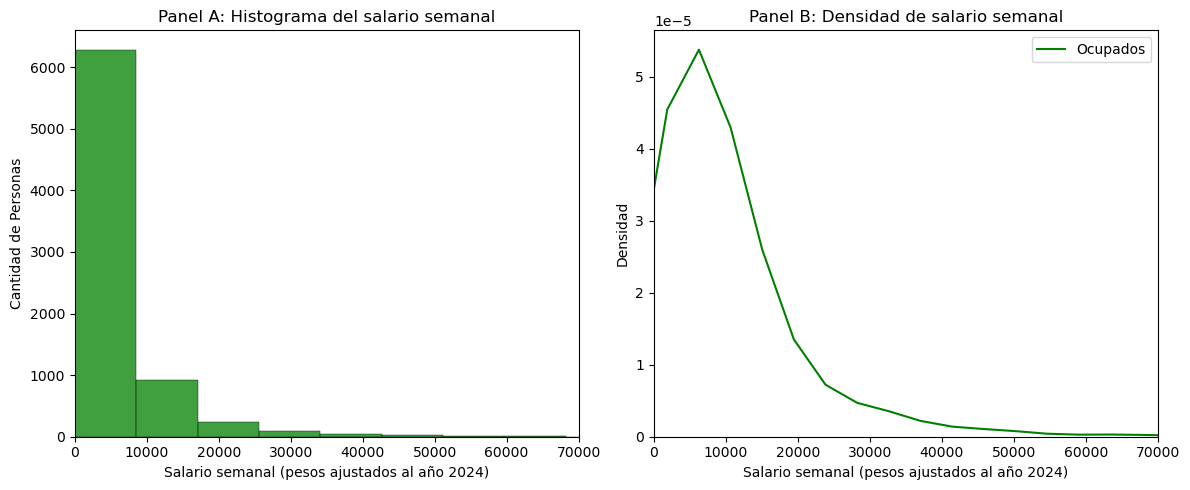

In [35]:
salario_semanal_2004 = individual_GBA_2004["salario_semanal"].dropna()
# Panel A: Histograma de salario semanal
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(salario_semanal_2004, bins=100, kde=False, color="green")
plt.title("Panel A: Histograma del salario semanal")
plt.xlabel("Salario semanal (pesos ajustados al año 2024)")
plt.ylabel("Cantidad de Personas")
plt.xlim(0, 70000)

# Panel B: Kernel para ocupados vs desocupados
plt.subplot(1, 2, 2)
ocupados = individual_GBA_2004[individual_GBA_2004["estado"] == "Ocupado"]["salario_semanal"]
desocupados = individual_GBA_2004[individual_GBA_2004["estado"] == "Desocupado"]["salario_semanal"]
sns.kdeplot(ocupados.dropna(), label="Ocupados", color="green")
sns.kdeplot(desocupados.dropna(), label="Desocupados", color="red")
plt.title("Panel B: Densidad de salario semanal")
plt.xlabel("Salario semanal (pesos ajustados al año 2024)")
plt.ylabel("Densidad")
plt.xlim(0, 70000)
plt.legend()
plt.savefig("gráfico ej 3 2004.png", bbox_inches='tight', dpi=300)
plt.tight_layout()
plt.show()

In [36]:
individual_GBA_2024["salario_semanal"] = individual_GBA_2024["P21"] / 40  
desc_salario = individual_GBA_2024["salario_semanal"].describe(percentiles=[0.5])[["mean", "std", "min", "50%", "max"]]
print(desc_salario.rename({"50%": "p50"}))

mean      3010.415494
std       7743.369171
min         -0.225000
p50          0.000000
max     200000.000000
Name: salario_semanal, dtype: float64


C:\Users\Joaquin\AppData\Local\Temp\ipykernel_10452\660778752.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  individual_GBA_2024["salario_semanal"] = individual_GBA_2024["P21"] / 40


C:\Users\Joaquin\AppData\Local\Temp\ipykernel_10452\323498339.py:16: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(desocupados.dropna(), label="Desocupados", color="red")


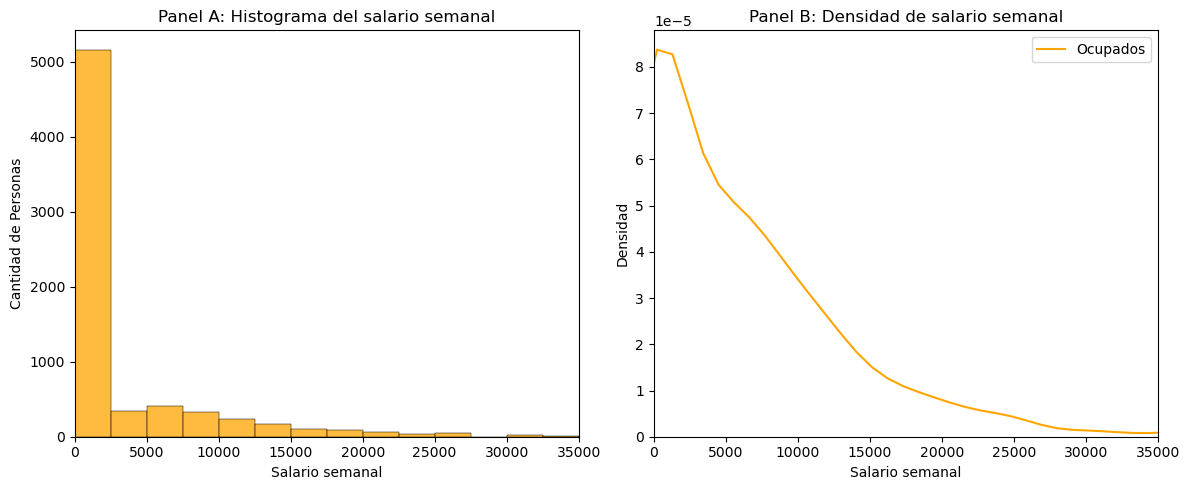

In [37]:
salario_semanal_2024 = individual_GBA_2024["salario_semanal"].dropna()
# Panel A: Histograma de salario semanal
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(salario_semanal_2024, bins=80, kde=False, color="orange")
plt.title("Panel A: Histograma del salario semanal")
plt.xlabel("Salario semanal")
plt.ylabel("Cantidad de Personas")
plt.xlim(0, 35000)

# Panel B: Kernel para ocupados vs desocupados
plt.subplot(1, 2, 2)
ocupados = individual_GBA_2024[individual_GBA_2024["estado"] == "Ocupado"]["salario_semanal"]
desocupados = individual_GBA_2024[individual_GBA_2024["estado"] == "Desocupado"]["salario_semanal"]
sns.kdeplot(ocupados.dropna(), label="Ocupados", color="orange")
sns.kdeplot(desocupados.dropna(), label="Desocupados", color="red")
plt.title("Panel B: Densidad de salario semanal")
plt.xlabel("Salario semanal")
plt.ylabel("Densidad")
plt.xlim(0, 35000)
plt.legend()
plt.savefig("gráfico ej 3 2024.png", bbox_inches='tight', dpi=300)
plt.tight_layout()
plt.show()

In [38]:
#En el Panel A del año 2004 observamos que el promedio de las personas tienen un salario semanal de aproximadamente $4150, siendo convertidos a valores del año 2024, lo que indica una alta concentración en salarios muy bajos, viendose sesgado por la gente que no responde de manera cierta. Con una dispersión de casi $13000 y un monto máximo de $852525 lo cual provoca que el promedio sea tan superior. En el Panel B, la distribución de ocupados es practicamente identica al histograma de salario semanal, lo que quiere decir que los desocupados no respondieron.
#Mientras que en el Panel A del año 2024 se puede observar que el promedio de las personas tienen un salario semanal de aproximadamente $3010, lo que indica una alta concentración en salarios muy bajos, viendose sesgado por la gente que no responde de manera cierta. con una dispersión de $7743 aproximadamente y un monto máximo de $200000. En el Panel B, la distribución de ocupados es practicamente identica al histograma de salario semanal, lo que quiere decir que los desocupados no respondieron.

In [39]:
#Parte 1, ejercicio 4
horastrab_2004 = individual_GBA_2004["pp3e_tot"].fillna(0) + individual_GBA_2004["pp3f_tot"].fillna(0)
desc_horastrab = horastrab_2004.describe(percentiles=[0.5])[["mean", "std", "min", "50%", "max"]]
desc_horastrab.rename({"50%": "p50"}, inplace=True)
print(desc_horastrab)

mean      18.271610
std       58.086405
min        0.000000
p50        0.000000
max     1044.000000
dtype: float64


In [40]:
horastrab_2024 = individual_GBA_2024["PP3E_TOT"].fillna(0) + individual_GBA_2024["PP3F_TOT"].fillna(0)
desc_horastrab = horastrab_2024.describe(percentiles=[0.5])[["mean", "std", "min", "50%", "max"]]
desc_horastrab.rename({"50%": "p50"}, inplace=True)
print(desc_horastrab)

mean      19.969366
std       71.844935
min        0.000000
p50        0.000000
max     1998.000000
dtype: float64


In [41]:
#La cantidad de horas trabajadas por semana del año 2004, siendo la suma de las horas de la ocupacion principal y otras ocupaciones en promedio son un poco mas de 18hs, con una dispersión muy alta, siendo aproximadamente 58 hs y un máximo de 1044hs lo cual eleva el promedio, siendo una cantidad imposible. Mientras que la cantidad de horas trabajadas por semana del año 2024, siendo la suma de las horas de la ocupacion principal y otras ocupaciones en promedio son casi 20hs, con una dispersión más alta que en 2004, siendo casi 72 hs y un máximo superior de 1998hs lo cual eleva el promedio por mucho, siendo imposible ese número. 

In [42]:
#Parte 1, Ejercicio 5, limpieza y homogeneización de algunas variables más 
estado_dict = {1: "Varón", 2: "Mujer"} 
individual_GBA_2024["ch04"] = individual_GBA_2024["CH04"].map(estado_dict)
individual_GBA_2024["ch04"].dropna()

C:\Users\Joaquin\AppData\Local\Temp\ipykernel_10452\237475307.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  individual_GBA_2024["ch04"] = individual_GBA_2024["CH04"].map(estado_dict)


245      Mujer
246      Varón
247      Mujer
255      Varón
256      Mujer
         ...  
46045    Mujer
46046    Varón
46047    Varón
46048    Varón
46049    Mujer
Name: ch04, Length: 7051, dtype: object

In [43]:
individual_GBA_2004["ch04"].str.strip("0.0").dropna()

0       Varón
1       Mujer
2       Mujer
3       Varón
4       Mujer
        ...  
7642    Mujer
7643    Varón
7644    Mujer
7645    Mujer
7646    Varón
Name: ch04, Length: 7647, dtype: object

In [44]:
estado_dict = {1:"Unido", 2:"Casado", 3:"Separado o divorciado", 4:"Viudo", 5:"Soltero", 6:"Ns./Nr."  } 
individual_GBA_2024["ch07"] = individual_GBA_2024["CH07"].map(estado_dict)
individual_GBA_2024["ch07"].dropna()

C:\Users\Joaquin\AppData\Local\Temp\ipykernel_10452\1204709875.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  individual_GBA_2024["ch07"] = individual_GBA_2024["CH07"].map(estado_dict)


245                      Viudo
246                     Casado
247                     Casado
255                    Soltero
256                      Viudo
                 ...          
46045    Separado o divorciado
46046                  Soltero
46047                  Soltero
46048                  Soltero
46049                  Soltero
Name: ch07, Length: 7038, dtype: object

In [45]:
individual_GBA_2004["ch07"].str.strip("0.0").dropna()

0                       Viudo
1       Separado o divorciado
2                       Viudo
3                      Casado
4                      Casado
                ...          
7642                  Soltero
7643                   Casado
7644                   Casado
7645                  Soltero
7646                  Soltero
Name: ch07, Length: 7647, dtype: object

In [46]:
estado_dict = {1:"Obra social (incluye PAMI) ", 2:"Mutual / Prepaga / Servicio de emergencia", 3:"Planes y seguros públicos", 4:"No paga ni le descuentan", 9:"Ns./Nr.", 12:"Obra social y mutual / prepaga / servicio de emergencia", 13:"Obra social y Planes y Seguros Públicos", 23:"Mutual /prepaga / servicio de emergencia / Planes y Seguros Públicos", 123:"Obra social, mutual / prepaga / servicio de emergencia y Planes y Seguros Públicos "} 
individual_GBA_2024["ch08"] = individual_GBA_2024["CH08"].map(estado_dict)
individual_GBA_2024["ch08"].dropna()

C:\Users\Joaquin\AppData\Local\Temp\ipykernel_10452\827278528.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  individual_GBA_2024["ch08"] = individual_GBA_2024["CH08"].map(estado_dict)


245      Obra social (incluye PAMI) 
246      Obra social (incluye PAMI) 
247      Obra social (incluye PAMI) 
255      Obra social (incluye PAMI) 
256      Obra social (incluye PAMI) 
                    ...             
46045    Obra social (incluye PAMI) 
46046    Obra social (incluye PAMI) 
46047    Obra social (incluye PAMI) 
46048    Obra social (incluye PAMI) 
46049    Obra social (incluye PAMI) 
Name: ch08, Length: 7051, dtype: object

In [47]:
individual_GBA_2004["ch08"].str.strip("0.0").dropna()

0                  Obra social (incluye PAMI)
1                    No paga ni le descuentan
2                  Obra social (incluye PAMI)
3       Mutual/Prepaga/Servicio de emergencia
4       Mutual/Prepaga/Servicio de emergencia
                        ...                  
7642    Mutual/Prepaga/Servicio de emergencia
7643               Obra social (incluye PAMI)
7644               Obra social (incluye PAMI)
7645               Obra social (incluye PAMI)
7646               Obra social (incluye PAMI)
Name: ch08, Length: 7647, dtype: object

In [48]:
estado_dict = {1:"Jubilado/pensionado", 2:"Rentista", 3:"Estudiante", 4:"Ama de casa", 5:"Menor de 6 años", 6:"Discapacitado", 7:"Otros"} 
individual_GBA_2024["cat_inac"] = individual_GBA_2024["CAT_INAC"].map(estado_dict)
individual_GBA_2024["cat_inac"].dropna()

C:\Users\Joaquin\AppData\Local\Temp\ipykernel_10452\1227610742.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  individual_GBA_2024["cat_inac"] = individual_GBA_2024["CAT_INAC"].map(estado_dict)


256      Jubilado/pensionado
277               Estudiante
278          Menor de 6 años
403      Jubilado/pensionado
405      Jubilado/pensionado
                ...         
46033        Menor de 6 años
46037             Estudiante
46038             Estudiante
46039             Estudiante
46041    Jubilado/pensionado
Name: cat_inac, Length: 3475, dtype: object

In [49]:
individual_GBA_2004["cat_inac"].str.strip("0.0").dropna()

0       Jubilado/pensionado
2       Jubilado/pensionado
4               Ama de casa
9                Estudiante
10               Estudiante
               ...         
7636             Estudiante
7639             Estudiante
7641            Ama de casa
7642        Menor de 6 años
7645             Estudiante
Name: cat_inac, Length: 4030, dtype: object

In [50]:
#Parte 2

In [51]:
#Ejercicio 1

In [52]:
individual_GBA_2004['edad2'] = edad2_2004
individual_GBA_2024['edad2'] = edad2_2024

#unificamos los nombres (la de educ ya esta concatenada con las dos bases)
individual_GBA_2004['ch06'] = pd.to_numeric(individual_GBA_2004['ch06'], errors='coerce')
individual_GBA_2024['ch06'] = pd.to_numeric(individual_GBA_2024['CH06'], errors='coerce')


individual_GBA_2004['salario_semanal'] = salario_semanal_2004
individual_GBA_2024['salario_semanal'] = salario_semanal_2024


individual_GBA_2004['horastrab'] = horastrab_2004
individual_GBA_2024['horastrab'] = horastrab_2024

C:\Users\Joaquin\AppData\Local\Temp\ipykernel_10452\980200351.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  individual_GBA_2004['edad2'] = edad2_2004
C:\Users\Joaquin\AppData\Local\Temp\ipykernel_10452\980200351.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  individual_GBA_2024['edad2'] = edad2_2024
C:\Users\Joaquin\AppData\Local\Temp\ipykernel_10452\980200351.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

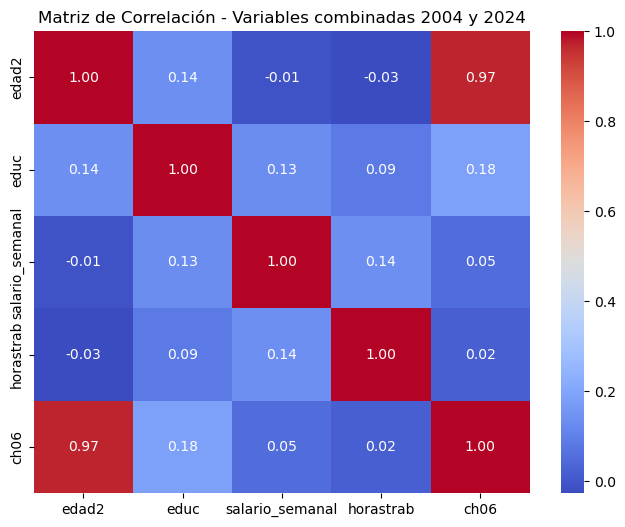

In [53]:
variables = ['edad2', 'educ', 'salario_semanal', 'horastrab', 'ch06']

df_2004 = individual_GBA_2004[variables].copy()
df_2024 = individual_GBA_2024[variables].copy()

for var in variables:
    df_2004[var] = pd.to_numeric(df_2004[var], errors='coerce')
    df_2024[var] = pd.to_numeric(df_2024[var], errors='coerce')

df_total = pd.concat([df_2004, df_2024], ignore_index=True)

df_total = df_total.dropna()

correlation_matrix = df_total.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación - Variables combinadas 2004 y 2024")
plt.savefig("matriz_corr_ej_1.png", bbox_inches='tight', dpi=300)
plt.show()

In [54]:
#parte 2, Ejercicio 2

In [55]:
import ISLP
from ISLP import load_data
from statsmodels.datasets import get_rdataset
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [56]:
scaler = StandardScaler(with_std=True, with_mean=True)

In [57]:
print (df_total.mean())
print (df_total.std())

edad2              2012.626550
educ                  7.970313
salario_semanal    4107.495419
horastrab            21.393534
ch06                 39.414740
dtype: float64
edad2               1898.082287
educ                   7.940832
salario_semanal    11577.969721
horastrab             68.350946
ch06                  21.427590
dtype: float64


In [58]:
df_estandarizado = pd.DataFrame(scaler.fit_transform(df_total), columns=df_total.columns)

In [59]:
print ("Media luego de estandarizar:","\n",df_estandarizado.mean())
print ("Desvio estandar luego de estandarizar:","\n",df_estandarizado.std())

Media luego de estandarizar: 
 edad2              1.819426e-17
educ              -7.391418e-18
salario_semanal    4.093709e-17
horastrab         -6.822848e-18
ch06              -3.638852e-17
dtype: float64
Desvio estandar luego de estandarizar: 
 edad2              1.00004
educ               1.00004
salario_semanal    1.00004
horastrab          1.00004
ch06               1.00004
dtype: float64


In [60]:
pca = PCA()
df_pca = pca.fit_transform(df_estandarizado)

In [61]:
scores = df_pca
print(scores)
print (scores.shape)

[[ 2.6285452  -1.17928987  0.65434417  0.46482757 -0.21834203]
 [ 1.7244659  -0.7656469   0.17779572  0.08093132  0.01944829]
 [ 2.30560255 -0.86962497  0.26459326  0.13643633 -0.11472952]
 ...
 [-1.35891209 -0.56516445  0.14913865  0.15776932  0.01580592]
 [-1.37749123 -0.50063829  0.06122661  0.08157903 -0.00569912]
 [-1.21353763 -0.58674517  0.17024519  0.17172713  0.06502669]]
(12497, 5)


Text(0.5, 1.0, 'Analisis de los primeros dos componentes principales de las variables pedidas')

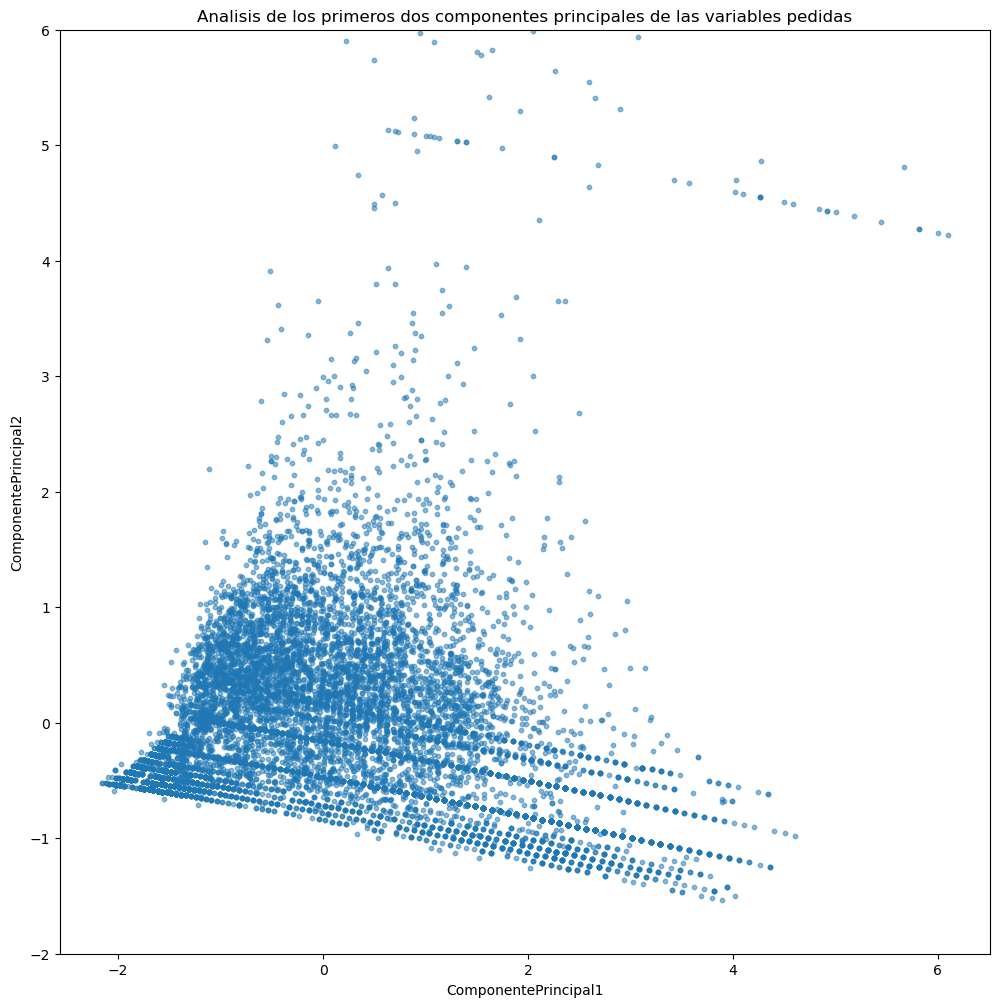

In [62]:
i, j = 0, 1 
fig, ax = plt.subplots(1, 1, figsize=(12, 12)) 
ax.scatter(scores[:,0], scores[:,1], alpha=0.5, s=10) 
ax.set_xlabel('ComponentePrincipal%d' % (i+1))
ax.set_ylabel('ComponentePrincipal%d' % (j+1))
plt.ylim(-2, 6)
plt.savefig("gráfico part 2 ej 2.png", bbox_inches='tight', dpi=300)
plt.title('Analisis de los primeros dos componentes principales de las variables pedidas')

In [63]:
#Ejercicio 3

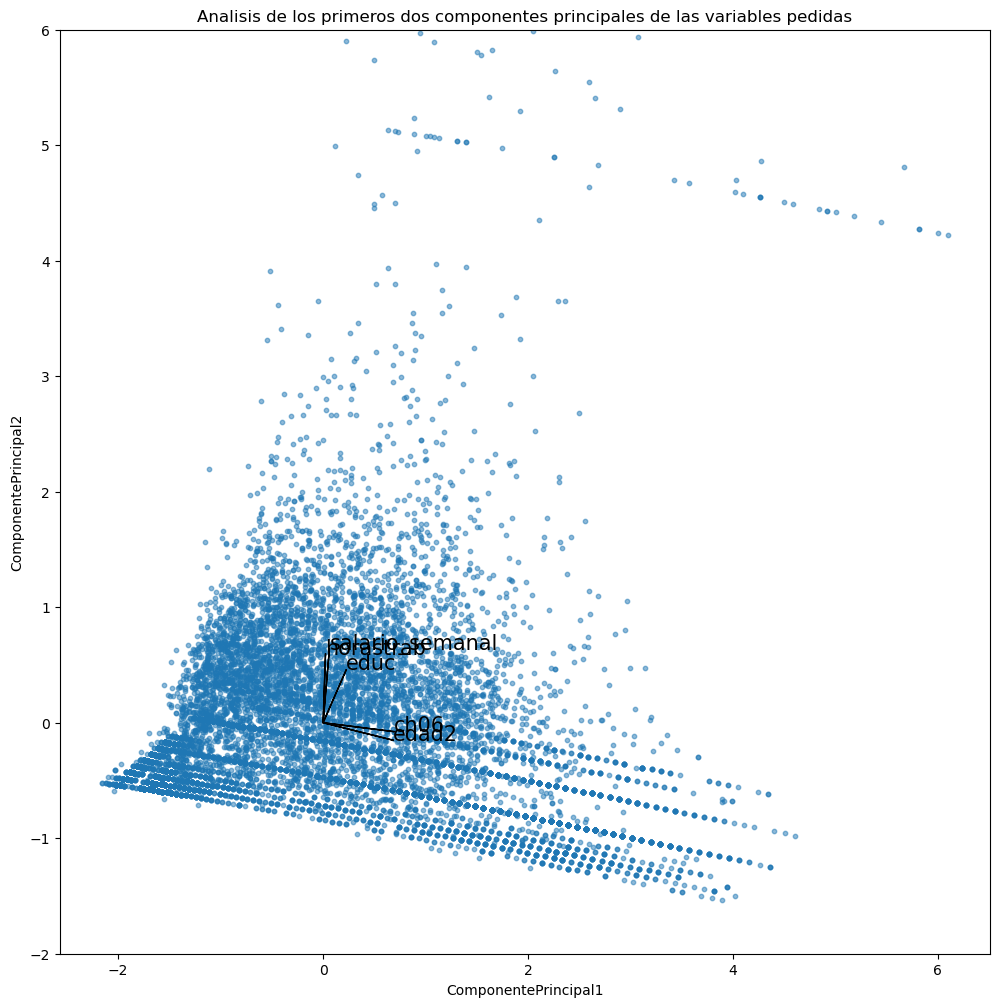

In [64]:



i, j = 0, 1 
fig, ax = plt.subplots(1, 1, figsize=(12, 12)) 
ax.scatter(scores[:,0], scores[:,1], alpha=0.5, s=10) 
ax.set_xlabel('ComponentePrincipal%d' % (i+1))
ax.set_ylabel('ComponentePrincipal%d' % (j+1))
plt.ylim(-2, 6)

plt.title('Analisis de los primeros dos componentes principales de las variables pedidas')
for k in range(pca.components_.shape[1]): 
    ax.arrow(0, 0, pca.components_[i,k], pca.components_[j,k]) 
    ax.text(pca.components_[i,k], pca.components_[j,k], df_total.columns[k], fontsize=15)

plt.savefig("gráfico part 2 ej 3.png", bbox_inches='tight', dpi=300)

In [65]:
#Ejercicio 4

In [66]:
print(pca.explained_variance_ratio_)

[0.40490863 0.24330332 0.17786941 0.16855271 0.00536594]


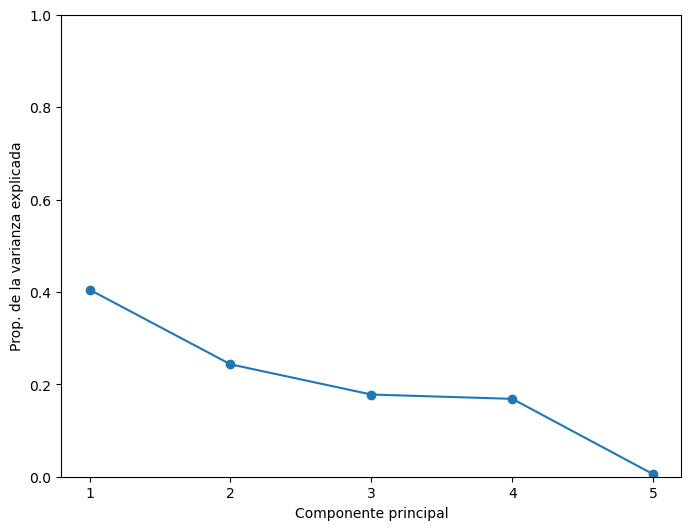

In [69]:
fig, ax = plt.subplots(figsize=(8, 6))
ticks = np.arange(pca.n_components_) + 1
ax.plot(ticks, pca.explained_variance_ratio_, marker='o')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Prop. de la varianza explicada')
ax.set_ylim([0, 1])
ax.set_xticks(ticks)
plt.savefig("gráfico part 2 ej 4.png", bbox_inches='tight', dpi=300)
plt.show()

In [70]:
df_5 = individual_GBA_2024.copy()

In [71]:
df_5 = df_5[["CH06", "P47T", "estado"]].dropna() 
df_5 = df_5[df_5["estado"].isin(["Ocupado", "Desocupado"])]

In [72]:
df_5 = df_5.rename(columns={"CH06": "edad", "P47T": "ingreso"})

In [73]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_5[["edad", "ingreso"]])

In [74]:
kmeans = KMeans(n_clusters=2, n_init=20, random_state=42)
df_5["cluster"] = kmeans.fit_predict(X_scaled)

C:\Users\Joaquin\AppData\Local\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] El sistema no puede encontrar el archivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Joaquin\AppData\Local\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\Joaquin\AppData\Local\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Joaquin\AppData\Local\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\Joaquin\AppData\Local\anacond

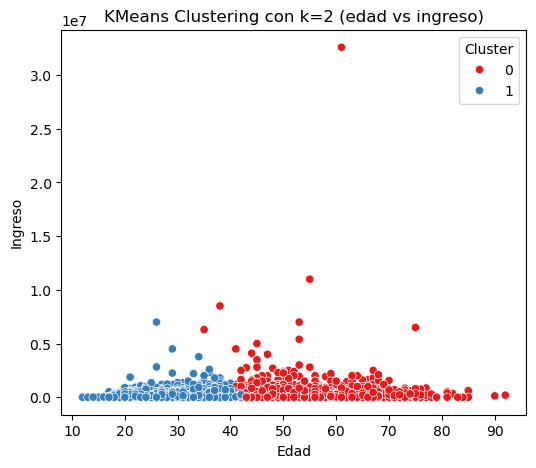

In [75]:
plt.figure(figsize=(6, 5))
sns.scatterplot(data=df_5, x="edad", y="ingreso", hue="cluster", palette="Set1")
plt.title("KMeans Clustering con k=2 (edad vs ingreso)")
plt.xlabel("Edad")
plt.ylabel("Ingreso")
plt.legend(title="Cluster")
plt.savefig("gráfico part 2 ej 5a1.png", bbox_inches='tight', dpi=300)
plt.show()

In [76]:
kmeans = KMeans(n_clusters=4, n_init=20, random_state=42)
df_5["cluster"] = kmeans.fit_predict(X_scaled)

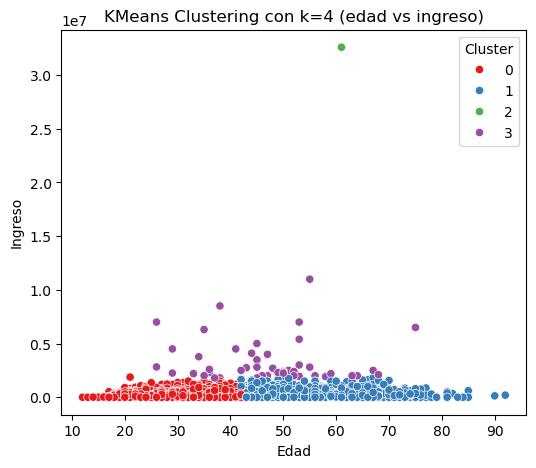

In [77]:
plt.figure(figsize=(6, 5))
sns.scatterplot(data=df_5, x="edad", y="ingreso", hue="cluster", palette="Set1")
plt.title("KMeans Clustering con k=4 (edad vs ingreso)")
plt.xlabel("Edad")
plt.ylabel("Ingreso")
plt.legend(title="Cluster")
plt.savefig("gráfico part 2 ej 5a2.png", bbox_inches='tight', dpi=300)
plt.show()

In [78]:
kmeans = KMeans(n_clusters=10, n_init=20, random_state=42)
df_5["cluster"] = kmeans.fit_predict(X_scaled)

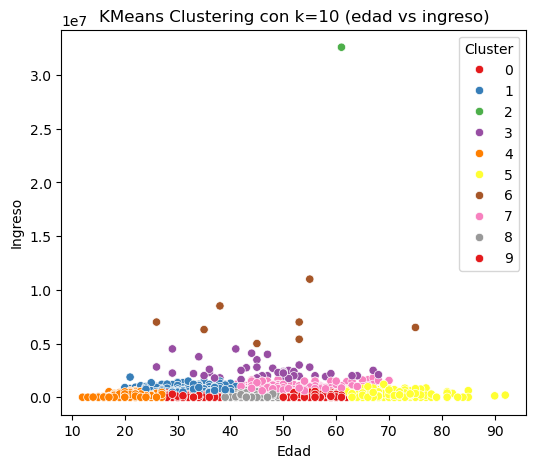

In [79]:
plt.figure(figsize=(6, 5))
sns.scatterplot(data=df_5, x="edad", y="ingreso", hue="cluster", palette="Set1")
plt.title("KMeans Clustering con k=10 (edad vs ingreso)")
plt.xlabel("Edad")
plt.ylabel("Ingreso")
plt.legend(title="Cluster")
plt.savefig("gráfico part 2 ej 5a3.png", bbox_inches='tight', dpi=300)
plt.show()

In [80]:
df_5b = individual_GBA_2024[
    individual_GBA_2024["estado"].isin(["Ocupado", "Desocupado"])
][["edad_2024_numeric", "educ", "estado"]].copy()
df_5b = df_5b.rename(columns={"edad_2024_numeric": "edad"})
df_5b["edad"] = pd.to_numeric(df_5b["edad"], errors="coerce")
df_5b["educ"] = pd.to_numeric(df_5b["educ"], errors="coerce")
df_5b = df_5b.dropna()

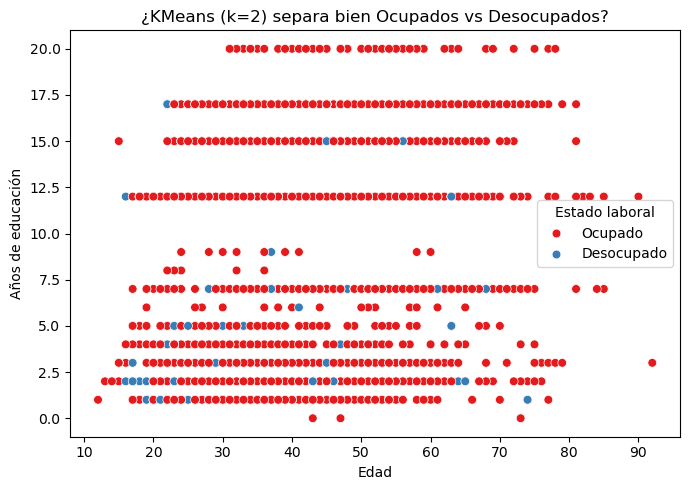

In [81]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df_5b, x="edad", y="educ", hue="estado", palette="Set1", s=40)
plt.title("¿KMeans (k=2) separa bien Ocupados vs Desocupados?")
plt.xlabel("Edad")
plt.ylabel("Años de educación")
plt.legend(title="Estado laboral")
plt.tight_layout()
plt.savefig("gráfico part 2 ej 5b.png", bbox_inches='tight', dpi=300)
plt.show()

In [82]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [83]:
df_6 = individual_GBA_2024[["edad_2024_numeric", "educ"]].copy()
df_6 = df_6.rename(columns={"edad_2024_numeric": "edad"})
df_6["edad"] = pd.to_numeric(df_6["edad"], errors="coerce")
df_6["educ"] = pd.to_numeric(df_6["educ"], errors="coerce")
df_6 = df_6.dropna()

In [84]:
if len(df_6) > 100:
    df_sample = df_6.sample(n=100, random_state=42)
else:
    df_sample = df_6.copy()

In [85]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_sample[["edad", "educ"]])

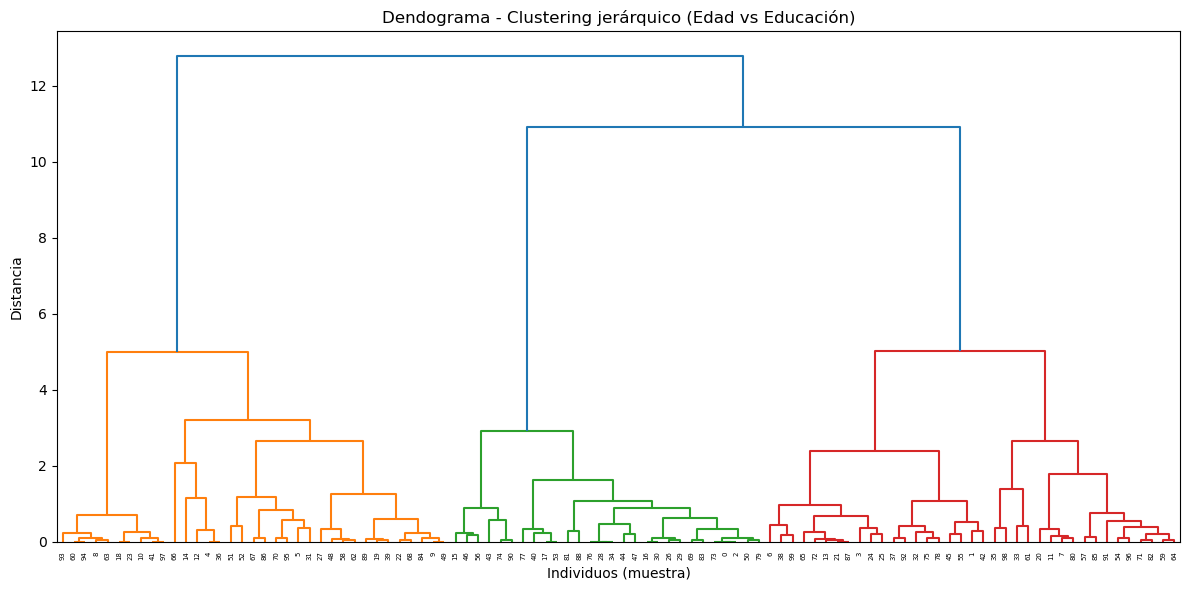

In [86]:
linkage_matrix = linkage(X_scaled, method="ward")

plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix)
plt.title("Dendograma - Clustering jerárquico (Edad vs Educación)")
plt.xlabel("Individuos (muestra)")
plt.ylabel("Distancia")
plt.tight_layout()
plt.savefig("gráfico part 2 ej 6.png", bbox_inches='tight', dpi=300)
plt.show()